In [1]:
import pandas as pd
import os

In [3]:
matchs = pd.read_csv(os.path.join("donnees_football\\Match.csv"))
Team = pd.read_csv(os.path.join("donnees_football\\Team.csv"))

Quel est le classement de la Premier League lors de la saison 2015/2016 ? On affichera le nombre de points, la différence de buts et le nombre de buts marqués car il s’agit des trois premiers critères pour déterminer le classement des équipes en cas d’égalité. Ces règles correspondent à celles de la Premier League, mais elles ne sont pas forcément valides pour les autres championnats du jeu de données. 

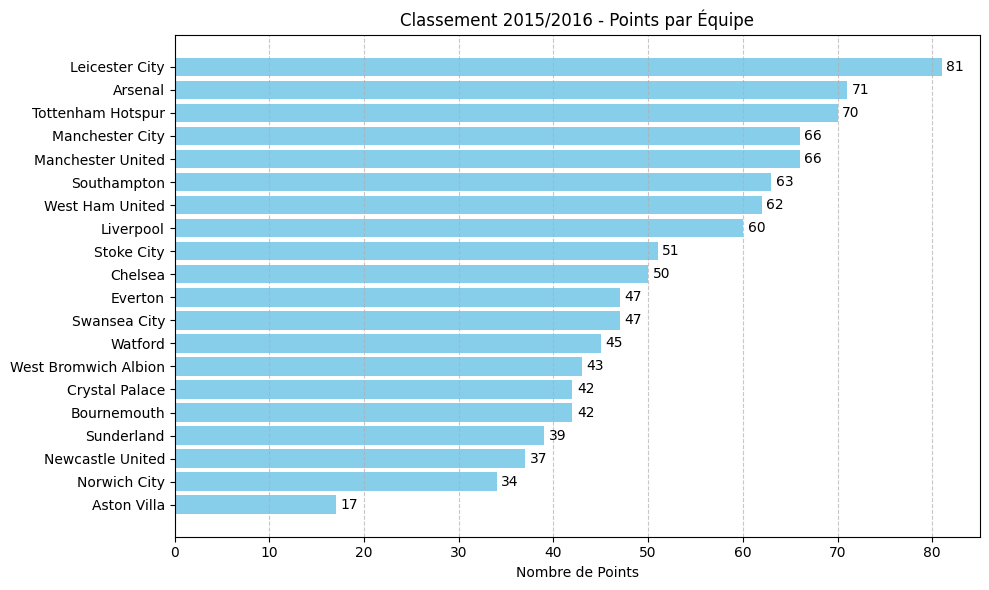

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def afficher_classement_barplot(matchs, team_data, league_id, saison):
    """
    Calcule le classement d'un championnat pour une saison donnée, avec les statistiques suivantes :
    - Points
    - Buts marqués
    - Buts encaissés
    - Différence de buts
    et affiche un barplot du résultat

    Args:
        matchs (DataFrame): Le DataFrame contenant les données des matchs.
        team_data (DataFrame): Le DataFrame contenant les noms des équipes.
        league_id (int): L'identifiant du championnat (ex : 1729 pour la Premier League).
        saison (str): La saison souhaitée (ex : "2015/2016").
    """
    # Filtrage des matchs
    matchs_ligue = matchs[(matchs["league_id"] == league_id) & (matchs["season"] == saison)]
    points = {}
    buts_marqués = {}
    buts_encaissés = {}
    diff_buts = {}

    # Calcul des statistiques
    for _, match in matchs_ligue.iterrows():
        home_id = match["home_team_api_id"]
        away_id = match["away_team_api_id"]
        home_goals = match["home_team_goal"]
        away_goals = match["away_team_goal"]

        for team_id in [home_id, away_id]:
            if team_id not in buts_encaissés:
                buts_encaissés[team_id] = 0
                buts_marqués[team_id] = 0
                points[team_id] = 0

        buts_marqués[home_id] += home_goals
        buts_encaissés[home_id] += away_goals
        buts_marqués[away_id] += away_goals
        buts_encaissés[away_id] += home_goals

        if home_goals > away_goals:
            points[home_id] += 3
        elif away_goals > home_goals:
            points[away_id] += 3
        else:
            points[home_id] += 1
            points[away_id] += 1

    # Calcul de la différence de buts
    for team_id in buts_marqués:
        diff_buts[team_id] = buts_marqués[team_id] - buts_encaissés[team_id]

    # Création du DataFrame
    equipes_du_classement = pd.DataFrame({
        "team_api_id": list(points.keys()),
        "Points": list(points.values()),
        "Différence de buts": [diff_buts[t] for t in points],
        "Buts marqués": [buts_marqués[t] for t in points]
    })

    # Tri du classement
    classement_sans_nom = equipes_du_classement.sort_values(
        by=["Points", "Différence de buts", "Buts marqués"],
        ascending=[False, False, False]
    ).reset_index(drop=True)

    # Associer chaque id à un nom d'équipe
    classement = classement_sans_nom.merge(team_data[["team_api_id", "team_long_name"]],
                                           on="team_api_id",
                                           how="left")

    # Réorganisation des colonnes
    classement = classement[["team_long_name", "Points", "Différence de buts", "Buts marqués"]]
    classement.columns = ["Équipe", "Points", "Différence de buts", "Buts marqués"]

    # Affichage du Bar Plot
    plt.figure(figsize=(10, 6))
    plt.barh(classement["Équipe"], classement["Points"], color='skyblue')
    plt.title(f"Classement {saison} - Points par Équipe")
    plt.xlabel("Nombre de Points")
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Afficher les valeurs sur les barres
    for index, value in enumerate(classement["Points"]):
        plt.text(value + 0.5, index, str(value), va='center')

    plt.tight_layout()
    plt.show()

afficher_classement_barplot(matchs, Team, 1729, "2015/2016")


Trier et mettre au propre le classement dans un dataframe panda

In [ ]:
classement = pd.DataFrame({
    "team_api_id": list(points.keys()),
    "nb_points": list(points.values()),
    "buts_marqués": [buts_marqués[t] for t in points],
    "diff_buts": [diff_buts[t] for t in points]
})
classement = classement.sort_values(
    by=["nb_points", "diff_buts", "buts_marqués"],
    ascending=[False, False, False]
).reset_index(drop=True)

# Mettre le nom des équipes dans le classement. Pour cela il faut chaque team_api_id au nom correspondant dans la table Team.
classement = classement.merge(Team[["team_api_id", "team_long_name"]],
                              on = "team_api_id",
                              how = "left")

# Réordonner l'ordre des colonnes
classement = classement[[
    "team_long_name",
    "nb_points",
    "diff_buts",
    "buts_marqués",
    "team_api_id"
]]

classement

,team_long_name,nb_points,diff_buts,buts_marqués,team_api_id
0,Leicester City,81,32,68,8197
1,Arsenal,71,29,65,9825
2,Tottenham Hotspur,70,34,69,8586
3,Manchester City,66,30,71,8456
4,Manchester United,66,14,49,10260
5,Southampton,63,18,59,8466
6,West Ham United,62,14,65,8654
7,Liverpool,60,13,63,8650
8,Stoke City,51,-14,41,10194
9,Chelsea,50,6,59,8455


In [ ]:
classements_saisons = []  # Pour stocker tous les classements

for saison in set(matchs_premier_league["season"]):
    points = {}
    buts_marqués = {}
    buts_encaissés = {}
    diff_buts = {}

    for _, match in matchs_premier_league[matchs_premier_league["season"] == saison].iterrows():
        home_id = match["home_team_api_id"]
        away_id = match["away_team_api_id"]
        home_goals = match["home_team_goal"]
        away_goals = match["away_team_goal"]

        for team_id in [home_id, away_id]:
            if team_id not in points:
                points[team_id] = 0
                buts_marqués[team_id] = 0
                buts_encaissés[team_id] = 0

        buts_marqués[home_id] += home_goals
        buts_encaissés[home_id] += away_goals
        buts_marqués[away_id] += away_goals
        buts_encaissés[away_id] += home_goals

        if home_goals > away_goals:
            points[home_id] += 3
        elif away_goals > home_goals:
            points[away_id] += 3
        else:
            points[home_id] += 1
            points[away_id] += 1

    for team_id in points:
        diff_buts[team_id] = buts_marqués[team_id] - buts_encaissés[team_id]

    classement = pd.DataFrame({
        "team_api_id": list(points.keys()),
        "nb_points": list(points.values()),
        "buts_marqués": [buts_marqués[t] for t in points],
        "buts_encaissés": [buts_encaissés[t] for t in points],
        "diff_buts": [diff_buts[t] for t in points],
        "season": saison
    })

    classement = classement.sort_values(
        by=["nb_points", "diff_buts", "buts_marqués"],
        ascending=[False, False, False]
    ).reset_index(drop=True)

    classement = classement.merge(Team[["team_api_id", "team_long_name"]],
                                  on="team_api_id",
                                  how="left")

    classements_saisons.append(classement)

# Fusion finale de tous les classements
liste_classement = pd.concat(classements_saisons, ignore_index=True)
liste_classement = liste_classement[[
    "team_long_name",
    "nb_points",
    "diff_buts",
    "buts_marqués",
    "team_api_id",
    "season"
]]
liste_classement

In [ ]:
liste_classement[liste_classement["season"] == "2013/2014"]

Quel est la moyenne du nombre de buts par match pour chaque championnat lors de la saison 2015/2016 ?(Python pur)

In [ ]:
with open(os.path.join("donnees_football","Match.csv")) as data:
    matchs = []
    intitules = data.readline().strip('\n').split(',')
    for ligne in data:
        infos = ligne.strip('\n').split(',')
        matchs.append(infos)

idx_season = intitules.index("season")
matchs_15_16 = [match for match in matchs if len(match) > idx_season and match[idx_season] == "2015/2016"]
matchs_15_16

nb_but = {} #nombre de but par championnat
nb_match = {}
buts_par_match = {}
idx_home_goal = intitules.index("home_team_goal")
idx_away_goal = intitules.index("away_team_goal")
idx_league = intitules.index("league_id")
for match in matchs_15_16:
    if not  match[idx_league] in nb_but:
        nb_but[match[idx_league]] = 0
    if not  match[idx_league] in nb_match:
        nb_match[match[idx_league]] = 0
    for league in nb_but:
        if match[idx_league] == league:
            but = int(match[idx_away_goal]) + int(match[idx_home_goal])
            nb_but[league] += but
    nb_match[match[idx_league]] += 1
    buts_par_match[match[idx_league]] = round(nb_but[match[idx_league]] / nb_match[match[idx_league]], 2)

buts_par_match

# Associer chaque identifiant à une équipe
with open(os.path.join("donnees_football", "League.csv")) as data:
    league = []
    intitules = data.readline().strip('\n').split(',')
    for ligne in data:
        infos = ligne.strip('\n').split(',')
        league.append(infos)
idx_id = intitules.index("id")
idx_name = intitules.index("name")

league_names = {}
for ligue in league:
    league_names[ligue[idx_id]] = ligue[idx_name]

league_names, buts_par_match

moyenne_par_match = {}

for league_id, moyenne in buts_par_match.items():
    league_name = league_names.get(league_id, f"Ligue {league_id}")
    moyenne_par_match[league_name] = moyenne

moyenne_par_match

# visualisation des résultats avec un bar plot
import matplotlib.pyplot as plt

moyenne_triee = dict(sorted(moyenne_par_match.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(10, 6))
plt.bar(moyenne_triee.keys(), moyenne_triee.values(), color='skyblue')

plt.title("Moyenne de buts par match par championnat (2015/2016)")
plt.xlabel("Championnat")
plt.ylabel("Moyenne de buts par match")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(moyenne_triee.values()):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom')

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'donnees_football\\Match.csv'